# Importing Libraries

In [365]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Importing Dataset

In [366]:
df=pd.read_csv(r"C:\Users\Ecjoee\Downloads\1805142.csv")
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200799538,UNITE trust,2019-12-04 00:00:00,2019.0,1.930163e+09,2019-11-19,20191117,20191119,20191204.0,USD,RV,1.0,NaN,25723.35,20191119.0,NAA8,1.930163e+09,0
1,U001,0200936373,SUPE,2019-07-05 00:00:00,2019.0,1.929510e+09,2019-06-20,20190618,20190620,20190705.0,USD,RV,1.0,NaN,151939.64,20190620.0,NAA8,1.929510e+09,0
2,U001,0200759878,SA systems,2020-02-24 00:00:00,2020.0,1.930477e+09,2020-02-06,20200205,20200206,20200221.0,USD,RV,1.0,NaN,34374.95,20200206.0,NAH4,1.930477e+09,0
3,U001,0200794332,COST us,2019-10-25 00:00:00,2019.0,1.930001e+09,2019-10-11,20191010,20191011,20191026.0,USD,RV,1.0,NaN,17815.31,20191011.0,NAAX,1.930001e+09,0
4,U001,0200769623,WAL-MAR us,2019-02-04 00:00:00,2019.0,1.928654e+09,2019-01-22,20190120,20190122,20190206.0,USD,RV,1.0,NaN,14330.98,20190122.0,NAH4,1.928654e+09,0


In [367]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [368]:
df.shape

(50000, 19)

In [369]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3240
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    8
isOpen                        0
dtype: int64

In [370]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999200e+04,50000.000000
mean,2019.191140,2.013124e+09,2.019238e+07,2.019241e+07,2.019256e+07,1.0,NaN,32216.620313,2.019241e+07,2.011926e+09,0.064800
std,0.393203,2.933498e+08,3.796001e+03,3.784817e+03,3.809196e+03,0.0,NaN,39353.652850,3.786375e+03,2.776622e+08,0.246175
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018110e+07,1.0,NaN,0.860000,2.018102e+07,1.928502e+09,0.000000
25%,2019.000000,1.929221e+09,2.019042e+07,2.019042e+07,2.019051e+07,1.0,NaN,4718.112500,2.019042e+07,1.929221e+09,0.000000
50%,2019.000000,1.929790e+09,2.019080e+07,2.019080e+07,2.019082e+07,1.0,NaN,17345.200000,2.019080e+07,1.929790e+09,0.000000
75%,2019.000000,1.930371e+09,2.019112e+07,2.019112e+07,2.019121e+07,1.0,NaN,46779.330000,2.019112e+07,1.930371e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,813905.360000,2.020052e+07,2.960634e+09,1.000000


# Data Preprocessing

In [371]:
#different types of currency used
df['invoice_currency'].value_counts()

USD    46049
CAD     3951
Name: invoice_currency, dtype: int64

In [372]:
#converting currency from cad to usd as taking usd default
df.loc[df['invoice_currency']== 'CAD',['total_open_amount']]=df.total_open_amount * 1.3
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200799538,UNITE trust,2019-12-04 00:00:00,2019.0,1.930163e+09,2019-11-19,20191117,20191119,20191204.0,USD,RV,1.0,NaN,25723.35,20191119.0,NAA8,1.930163e+09,0
1,U001,0200936373,SUPE,2019-07-05 00:00:00,2019.0,1.929510e+09,2019-06-20,20190618,20190620,20190705.0,USD,RV,1.0,NaN,151939.64,20190620.0,NAA8,1.929510e+09,0
2,U001,0200759878,SA systems,2020-02-24 00:00:00,2020.0,1.930477e+09,2020-02-06,20200205,20200206,20200221.0,USD,RV,1.0,NaN,34374.95,20200206.0,NAH4,1.930477e+09,0
3,U001,0200794332,COST us,2019-10-25 00:00:00,2019.0,1.930001e+09,2019-10-11,20191010,20191011,20191026.0,USD,RV,1.0,NaN,17815.31,20191011.0,NAAX,1.930001e+09,0
4,U001,0200769623,WAL-MAR us,2019-02-04 00:00:00,2019.0,1.928654e+09,2019-01-22,20190120,20190122,20190206.0,USD,RV,1.0,NaN,14330.98,20190122.0,NAH4,1.928654e+09,0


In [373]:
#drop entire column as it is null
df=df.drop(['area_business'],axis=1)
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200799538,UNITE trust,2019-12-04 00:00:00,2019.0,1.930163e+09,2019-11-19,20191117,20191119,20191204.0,USD,RV,1.0,25723.35,20191119.0,NAA8,1.930163e+09,0
1,U001,0200936373,SUPE,2019-07-05 00:00:00,2019.0,1.929510e+09,2019-06-20,20190618,20190620,20190705.0,USD,RV,1.0,151939.64,20190620.0,NAA8,1.929510e+09,0
2,U001,0200759878,SA systems,2020-02-24 00:00:00,2020.0,1.930477e+09,2020-02-06,20200205,20200206,20200221.0,USD,RV,1.0,34374.95,20200206.0,NAH4,1.930477e+09,0
3,U001,0200794332,COST us,2019-10-25 00:00:00,2019.0,1.930001e+09,2019-10-11,20191010,20191011,20191026.0,USD,RV,1.0,17815.31,20191011.0,NAAX,1.930001e+09,0
4,U001,0200769623,WAL-MAR us,2019-02-04 00:00:00,2019.0,1.928654e+09,2019-01-22,20190120,20190122,20190206.0,USD,RV,1.0,14330.98,20190122.0,NAH4,1.928654e+09,0


In [374]:
#checking whether invoice_id is equal to doc_id 
#almost similar we can drop one column i.e. invoice_id
a = df['invoice_id']
b = df['doc_id']
dif=pd.Series(np.where(a==b,0,"not same"))
dif.value_counts()

0           49992
not same        8
dtype: int64

In [375]:
# dropping invoice_id as discussed above
df=df.drop(['invoice_id'],axis=1)
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200799538,UNITE trust,2019-12-04 00:00:00,2019.0,1.930163e+09,2019-11-19,20191117,20191119,20191204.0,USD,RV,1.0,25723.35,20191119.0,NAA8,0
1,U001,0200936373,SUPE,2019-07-05 00:00:00,2019.0,1.929510e+09,2019-06-20,20190618,20190620,20190705.0,USD,RV,1.0,151939.64,20190620.0,NAA8,0
2,U001,0200759878,SA systems,2020-02-24 00:00:00,2020.0,1.930477e+09,2020-02-06,20200205,20200206,20200221.0,USD,RV,1.0,34374.95,20200206.0,NAH4,0
3,U001,0200794332,COST us,2019-10-25 00:00:00,2019.0,1.930001e+09,2019-10-11,20191010,20191011,20191026.0,USD,RV,1.0,17815.31,20191011.0,NAAX,0
4,U001,0200769623,WAL-MAR us,2019-02-04 00:00:00,2019.0,1.928654e+09,2019-01-22,20190120,20190122,20190206.0,USD,RV,1.0,14330.98,20190122.0,NAH4,0


In [376]:
#checking whether there are any constant columns
constant_cols = [x for x in df.columns if df[x].nunique()== 1]
print(constant_cols)

['posting_id']


In [377]:
#dropping posting id as it is a constant column
df=df.drop(['posting_id'],axis=1)
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200799538,UNITE trust,2019-12-04 00:00:00,2019.0,1.930163e+09,2019-11-19,20191117,20191119,20191204.0,USD,RV,25723.35,20191119.0,NAA8,0
1,U001,0200936373,SUPE,2019-07-05 00:00:00,2019.0,1.929510e+09,2019-06-20,20190618,20190620,20190705.0,USD,RV,151939.64,20190620.0,NAA8,0
2,U001,0200759878,SA systems,2020-02-24 00:00:00,2020.0,1.930477e+09,2020-02-06,20200205,20200206,20200221.0,USD,RV,34374.95,20200206.0,NAH4,0
3,U001,0200794332,COST us,2019-10-25 00:00:00,2019.0,1.930001e+09,2019-10-11,20191010,20191011,20191026.0,USD,RV,17815.31,20191011.0,NAAX,0
4,U001,0200769623,WAL-MAR us,2019-02-04 00:00:00,2019.0,1.928654e+09,2019-01-22,20190120,20190122,20190206.0,USD,RV,14330.98,20190122.0,NAH4,0


In [378]:
df['isOpen'].value_counts()

0    46760
1     3240
Name: isOpen, dtype: int64

In [379]:
df['document type'].value_counts()

RV    49992
X2        8
Name: document type, dtype: int64

In [380]:
#dropping other columns
#we have converted to usd currency so dropping it
#document_create_date is similar to document_create_date.1 as document
df=df.drop(['document_create_date','posting_date','baseline_create_date',
            'isOpen','document type',
            'invoice_currency'],axis=1)
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms
0,U001,0200799538,UNITE trust,2019-12-04 00:00:00,2019.0,1.930163e+09,20191119,20191204.0,25723.35,NAA8
1,U001,0200936373,SUPE,2019-07-05 00:00:00,2019.0,1.929510e+09,20190620,20190705.0,151939.64,NAA8
2,U001,0200759878,SA systems,2020-02-24 00:00:00,2020.0,1.930477e+09,20200206,20200221.0,34374.95,NAH4
3,U001,0200794332,COST us,2019-10-25 00:00:00,2019.0,1.930001e+09,20191011,20191026.0,17815.31,NAAX
4,U001,0200769623,WAL-MAR us,2019-02-04 00:00:00,2019.0,1.928654e+09,20190122,20190206.0,14330.98,NAH4


In [381]:
#changing data types to datetime
df['document_create_date.1']= df['document_create_date.1'].astype(str)
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format="%Y %m %d")
df['due_in_date']=pd.to_datetime(df['due_in_date'],format="%Y%m%d")
df['clear_date']=pd.to_datetime(df['clear_date'],format="%Y %m %d")
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms
0,U001,0200799538,UNITE trust,2019-12-04,2019.0,1.930163e+09,2019-11-19,2019-12-04,25723.35,NAA8
1,U001,0200936373,SUPE,2019-07-05,2019.0,1.929510e+09,2019-06-20,2019-07-05,151939.64,NAA8
2,U001,0200759878,SA systems,2020-02-24,2020.0,1.930477e+09,2020-02-06,2020-02-21,34374.95,NAH4
3,U001,0200794332,COST us,2019-10-25,2019.0,1.930001e+09,2019-10-11,2019-10-26,17815.31,NAAX
4,U001,0200769623,WAL-MAR us,2019-02-04,2019.0,1.928654e+09,2019-01-22,2019-02-06,14330.98,NAH4


In [382]:
#anomaly removing as due_in_data cant be greater than document_create_date
df = df.drop(df[df['due_in_date'] < df['document_create_date.1']].index,axis=0)
df.shape

(49850, 10)

In [383]:
#renaming column
df=df.rename(columns={'name_customer':'cust_name','document_create_date.1':'doc_create_date'})
df.head(5)

,business_code,cust_number,cust_name,clear_date,buisness_year,doc_id,doc_create_date,due_in_date,total_open_amount,cust_payment_terms
0,U001,0200799538,UNITE trust,2019-12-04,2019.0,1.930163e+09,2019-11-19,2019-12-04,25723.35,NAA8
1,U001,0200936373,SUPE,2019-07-05,2019.0,1.929510e+09,2019-06-20,2019-07-05,151939.64,NAA8
2,U001,0200759878,SA systems,2020-02-24,2020.0,1.930477e+09,2020-02-06,2020-02-21,34374.95,NAH4
3,U001,0200794332,COST us,2019-10-25,2019.0,1.930001e+09,2019-10-11,2019-10-26,17815.31,NAAX
4,U001,0200769623,WAL-MAR us,2019-02-04,2019.0,1.928654e+09,2019-01-22,2019-02-06,14330.98,NAH4


# Train,test,validation split

In [384]:
#splitting clear_date,create_date,due_Date into days,month adn yead
df['clear_day']=df['clear_date'].dt.day
df['clear_month']=df['clear_date'].dt.month
df['clear_year']=df['clear_date'].dt.year

df['due_day']=df['due_in_date'].dt.day
df['due_month']=df['due_in_date'].dt.month
df['due_year']=df['due_in_date'].dt.year


df['create_day']=df['doc_create_date'].dt.day
df['create_month']=df['doc_create_date'].dt.month
df['create_year']=df['doc_create_date'].dt.year

In [385]:
#calculating delay 
df['delay']=(df['clear_date']-df['due_in_date']).dt.days
df['delay']

0        0.0
1        0.0
2        3.0
3       -1.0
4       -2.0
        ... 
49995    NaN
49996    NaN
49997    NaN
49998    NaN
49999    NaN
Name: delay, Length: 49850, dtype: float64

In [386]:
#dropping clear_Date adn due date as we have converted it
df=df.drop(['clear_date','due_in_date'],axis=1)
df.head(5)

,business_code,cust_number,cust_name,buisness_year,doc_id,doc_create_date,total_open_amount,cust_payment_terms,clear_day,clear_month,clear_year,due_day,due_month,due_year,create_day,create_month,create_year,delay
0,U001,0200799538,UNITE trust,2019.0,1.930163e+09,2019-11-19,25723.35,NAA8,4.0,12.0,2019.0,4,12,2019,19,11,2019,0.0
1,U001,0200936373,SUPE,2019.0,1.929510e+09,2019-06-20,151939.64,NAA8,5.0,7.0,2019.0,5,7,2019,20,6,2019,0.0
2,U001,0200759878,SA systems,2020.0,1.930477e+09,2020-02-06,34374.95,NAH4,24.0,2.0,2020.0,21,2,2020,6,2,2020,3.0
3,U001,0200794332,COST us,2019.0,1.930001e+09,2019-10-11,17815.31,NAAX,25.0,10.0,2019.0,26,10,2019,11,10,2019,-1.0
4,U001,0200769623,WAL-MAR us,2019.0,1.928654e+09,2019-01-22,14330.98,NAH4,4.0,2.0,2019.0,6,2,2019,22,1,2019,-2.0


In [387]:
#we are predicting on this data
#test set 
super_test=df[df['delay'].isnull()]
super_test.head()
super_test.shape

(3224, 18)

In [388]:
super_test.head()

,business_code,cust_number,cust_name,buisness_year,doc_id,doc_create_date,total_open_amount,cust_payment_terms,clear_day,clear_month,clear_year,due_day,due_month,due_year,create_day,create_month,create_year,delay
46761,CA02,0140104409,LOB associates,2020.0,2.960618e+09,2020-03-02,57104.06,CA10,NaN,NaN,NaN,12,3,2020,2,3,2020,NaN
46762,U001,0200726979,BJ'S corporation,2020.0,1.930628e+09,2020-03-09,538.02,NAA8,NaN,NaN,NaN,24,3,2020,9,3,2020,NaN
46763,U001,0200769623,WAL-MAR foundation,2020.0,1.930705e+09,2020-03-27,15778.07,NAH4,NaN,NaN,NaN,11,4,2020,27,3,2020,NaN
46764,U001,0200794332,COST corporation,2020.0,1.930690e+09,2020-03-24,8898.37,NAAX,NaN,NaN,NaN,8,4,2020,24,3,2020,NaN
46765,U001,0200762301,C&S WH in,2020.0,1.930752e+09,2020-04-06,20883.16,NAC6,NaN,NaN,NaN,21,4,2020,6,4,2020,NaN


In [389]:
#removing non null delay data from df 
df=df[df['delay'].notnull()]
df.head(5)

,business_code,cust_number,cust_name,buisness_year,doc_id,doc_create_date,total_open_amount,cust_payment_terms,clear_day,clear_month,clear_year,due_day,due_month,due_year,create_day,create_month,create_year,delay
0,U001,0200799538,UNITE trust,2019.0,1.930163e+09,2019-11-19,25723.35,NAA8,4.0,12.0,2019.0,4,12,2019,19,11,2019,0.0
1,U001,0200936373,SUPE,2019.0,1.929510e+09,2019-06-20,151939.64,NAA8,5.0,7.0,2019.0,5,7,2019,20,6,2019,0.0
2,U001,0200759878,SA systems,2020.0,1.930477e+09,2020-02-06,34374.95,NAH4,24.0,2.0,2020.0,21,2,2020,6,2,2020,3.0
3,U001,0200794332,COST us,2019.0,1.930001e+09,2019-10-11,17815.31,NAAX,25.0,10.0,2019.0,26,10,2019,11,10,2019,-1.0
4,U001,0200769623,WAL-MAR us,2019.0,1.928654e+09,2019-01-22,14330.98,NAH4,4.0,2.0,2019.0,6,2,2019,22,1,2019,-2.0


In [390]:
#predicting on this data
#super_delay=df[df['delay'].isnull()]
#super_delay.head(5)
#super_delay.shape

In [391]:
df.dtypes

business_code                 object
cust_number                   object
cust_name                     object
buisness_year                float64
doc_id                       float64
doc_create_date       datetime64[ns]
total_open_amount            float64
cust_payment_terms            object
clear_day                    float64
clear_month                  float64
clear_year                   float64
due_day                        int64
due_month                      int64
due_year                       int64
create_day                     int64
create_month                   int64
create_year                    int64
delay                        float64
dtype: object

In [392]:
#sorting values according to doc_create_date
df.sort_values(by=['doc_create_date'],ascending=True).reset_index()
df.head(5)

,business_code,cust_number,cust_name,buisness_year,doc_id,doc_create_date,total_open_amount,cust_payment_terms,clear_day,clear_month,clear_year,due_day,due_month,due_year,create_day,create_month,create_year,delay
0,U001,0200799538,UNITE trust,2019.0,1.930163e+09,2019-11-19,25723.35,NAA8,4.0,12.0,2019.0,4,12,2019,19,11,2019,0.0
1,U001,0200936373,SUPE,2019.0,1.929510e+09,2019-06-20,151939.64,NAA8,5.0,7.0,2019.0,5,7,2019,20,6,2019,0.0
2,U001,0200759878,SA systems,2020.0,1.930477e+09,2020-02-06,34374.95,NAH4,24.0,2.0,2020.0,21,2,2020,6,2,2020,3.0
3,U001,0200794332,COST us,2019.0,1.930001e+09,2019-10-11,17815.31,NAAX,25.0,10.0,2019.0,26,10,2019,11,10,2019,-1.0
4,U001,0200769623,WAL-MAR us,2019.0,1.928654e+09,2019-01-22,14330.98,NAH4,4.0,2.0,2019.0,6,2,2019,22,1,2019,-2.0


In [393]:
#after sorting, doc_create_date is of no use
df=df.drop(['doc_create_date'],axis=1)
df.head(5)

,business_code,cust_number,cust_name,buisness_year,doc_id,total_open_amount,cust_payment_terms,clear_day,clear_month,clear_year,due_day,due_month,due_year,create_day,create_month,create_year,delay
0,U001,0200799538,UNITE trust,2019.0,1.930163e+09,25723.35,NAA8,4.0,12.0,2019.0,4,12,2019,19,11,2019,0.0
1,U001,0200936373,SUPE,2019.0,1.929510e+09,151939.64,NAA8,5.0,7.0,2019.0,5,7,2019,20,6,2019,0.0
2,U001,0200759878,SA systems,2020.0,1.930477e+09,34374.95,NAH4,24.0,2.0,2020.0,21,2,2020,6,2,2020,3.0
3,U001,0200794332,COST us,2019.0,1.930001e+09,17815.31,NAAX,25.0,10.0,2019.0,26,10,2019,11,10,2019,-1.0
4,U001,0200769623,WAL-MAR us,2019.0,1.928654e+09,14330.98,NAH4,4.0,2.0,2019.0,6,2,2019,22,1,2019,-2.0


In [394]:
df.columns

Index(['business_code', 'cust_number', 'cust_name', 'buisness_year', 'doc_id',
       'total_open_amount', 'cust_payment_terms', 'clear_day', 'clear_month',
       'clear_year', 'due_day', 'due_month', 'due_year', 'create_day',
       'create_month', 'create_year', 'delay'],
      dtype='object')

In [395]:
#splitting columns for train,val split
inp=['business_code', 'cust_number', 'cust_name', 'buisness_year', 'doc_id',
       'total_open_amount', 'cust_payment_terms', 'clear_day', 'clear_month',
       'clear_year', 'due_day', 'due_month', 'due_year', 'create_day',
       'create_month', 'create_year']
out=['delay']

In [396]:
#splitting into train and val set in 70:30
x_train,x_val,y_train,y_val=train_test_split(df[inp],df[out],test_size=0.3,shuffle=False,random_state=42)
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)

(32638, 16) (13988, 16) (32638, 1) (13988, 1)


In [397]:
#splitting into val1,val2 from val set in 50:50
x_val1,x_val2,y_val1,y_val2=train_test_split(x_val[inp],y_val[out],test_size=0.5,shuffle=False,random_state=42)
print(x_val1.shape,x_val2.shape,y_val1.shape,y_val2.shape)

(6994, 16) (6994, 16) (6994, 1) (6994, 1)


In [398]:
x_train.head()

,business_code,cust_number,cust_name,buisness_year,doc_id,total_open_amount,cust_payment_terms,clear_day,clear_month,clear_year,due_day,due_month,due_year,create_day,create_month,create_year
0,U001,0200799538,UNITE trust,2019.0,1.930163e+09,25723.35,NAA8,4.0,12.0,2019.0,4,12,2019,19,11,2019
1,U001,0200936373,SUPE,2019.0,1.929510e+09,151939.64,NAA8,5.0,7.0,2019.0,5,7,2019,20,6,2019
2,U001,0200759878,SA systems,2020.0,1.930477e+09,34374.95,NAH4,24.0,2.0,2020.0,21,2,2020,6,2,2020
3,U001,0200794332,COST us,2019.0,1.930001e+09,17815.31,NAAX,25.0,10.0,2019.0,26,10,2019,11,10,2019
4,U001,0200769623,WAL-MAR us,2019.0,1.928654e+09,14330.98,NAH4,4.0,2.0,2019.0,6,2,2019,22,1,2019


In [399]:
y_train.head()

,delay
0,0.0
1,0.0
2,3.0
3,-1.0
4,-2.0


In [400]:
x_val1.head()

,business_code,cust_number,cust_name,buisness_year,doc_id,total_open_amount,cust_payment_terms,clear_day,clear_month,clear_year,due_day,due_month,due_year,create_day,create_month,create_year
32727,CA02,0140106408,WAL-M corp,2019.0,2.960528e+09,30527.263,CA10,28.0,2.0,2019.0,22,2,2019,11,2,2019
32728,U001,0200761734,H E BUT corp,2019.0,1.929742e+09,13929.510,NAA8,30.0,8.0,2019.0,1,9,2019,17,8,2019
32729,U001,0200936373,SUPE foundation,2019.0,1.929881e+09,25673.540,NAA8,2.0,10.0,2019.0,2,10,2019,17,9,2019
32730,U001,0200769623,WAL-MAR co,2019.0,1.928808e+09,267.300,NAH4,28.0,2.0,2019.0,4,3,2019,17,2,2019
32731,U001,0200712105,WALG in,2019.0,1.928589e+09,99691.600,NAA8,19.0,2.0,2019.0,22,1,2019,7,1,2019


In [401]:
x_val2.head()

,business_code,cust_number,cust_name,buisness_year,doc_id,total_open_amount,cust_payment_terms,clear_day,clear_month,clear_year,due_day,due_month,due_year,create_day,create_month,create_year
39741,U001,0200778998,CE trust,2019.0,1.929512e+09,88482.55,NAA8,5.0,7.0,2019.0,4,7,2019,19,6,2019
39742,U001,0200714710,SYSCO corporation,2019.0,1.929770e+09,23142.99,NAA8,9.0,9.0,2019.0,6,9,2019,22,8,2019
39743,U001,0200780383,MEIJ corp,2019.0,1.929980e+09,16409.48,NAA8,23.0,10.0,2019.0,22,10,2019,7,10,2019
39744,U001,0200769623,WAL-MAR systems,2019.0,1.929058e+09,1020.97,NAH4,10.0,4.0,2019.0,15,4,2019,31,3,2019
39745,U001,0200353024,DECA corp,2019.0,1.928999e+09,4267.10,NAM4,1.0,4.0,2019.0,8,4,2019,21,3,2019


In [402]:
y_val1.head()

,delay
32727,6.0
32728,-2.0
32729,0.0
32730,-4.0
32731,28.0


In [403]:
y_val2.head()

,delay
39741,1.0
39742,3.0
39743,1.0
39744,-5.0
39745,-7.0


# Exploratory Data Analysis(EDA)

<AxesSubplot:xlabel='business_code', ylabel='count'>

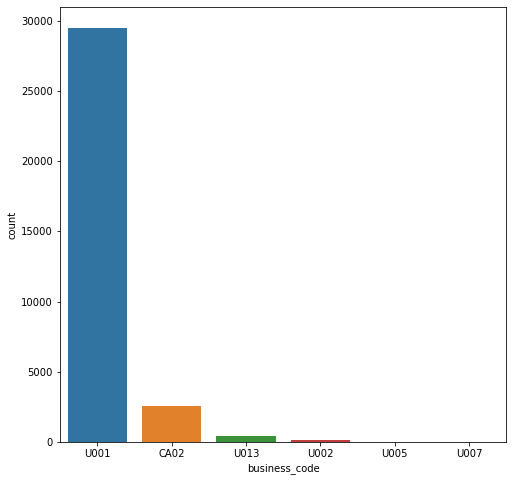

In [404]:
#checking whether same business codes are appeared how many times
plt.figure(figsize=(8,8))
sns.countplot(x_train['business_code'],data=x_train)

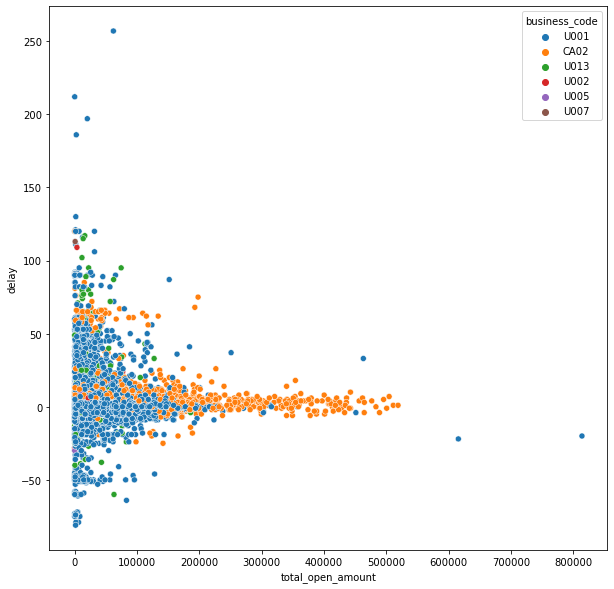

In [405]:
#checking relation between total amount and delay whether how much delay the person can do for the payment according to differen
#business codes
plt.figure(figsize=(10,10))
sns.scatterplot(x_train['total_open_amount'],y_train['delay'],hue=x_train['business_code'],data=x_train)
plt.show()

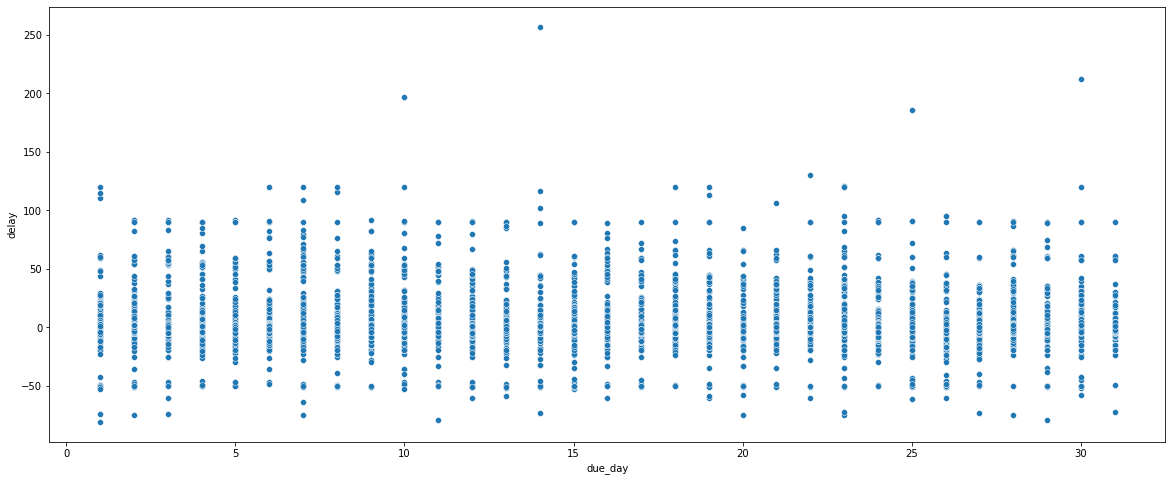

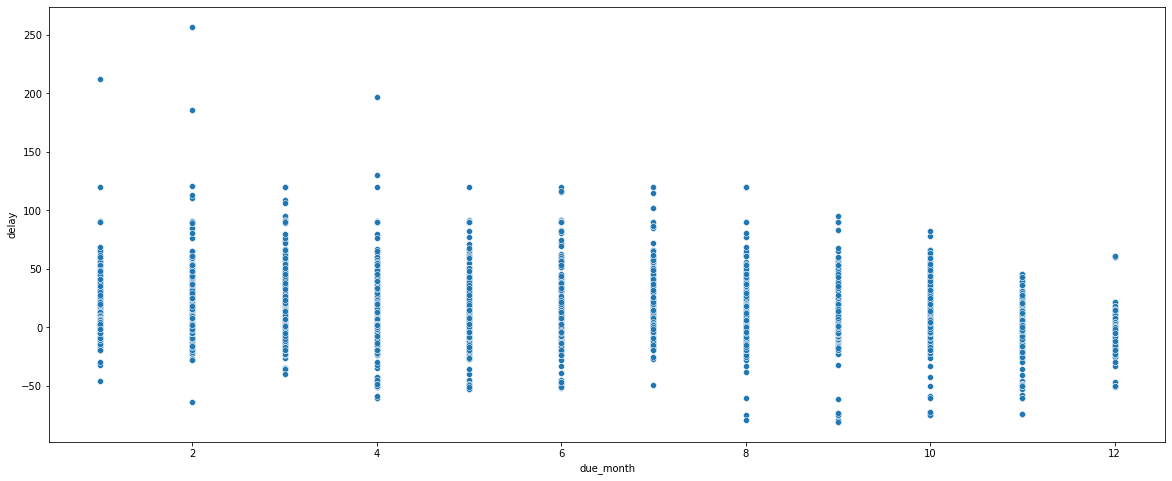

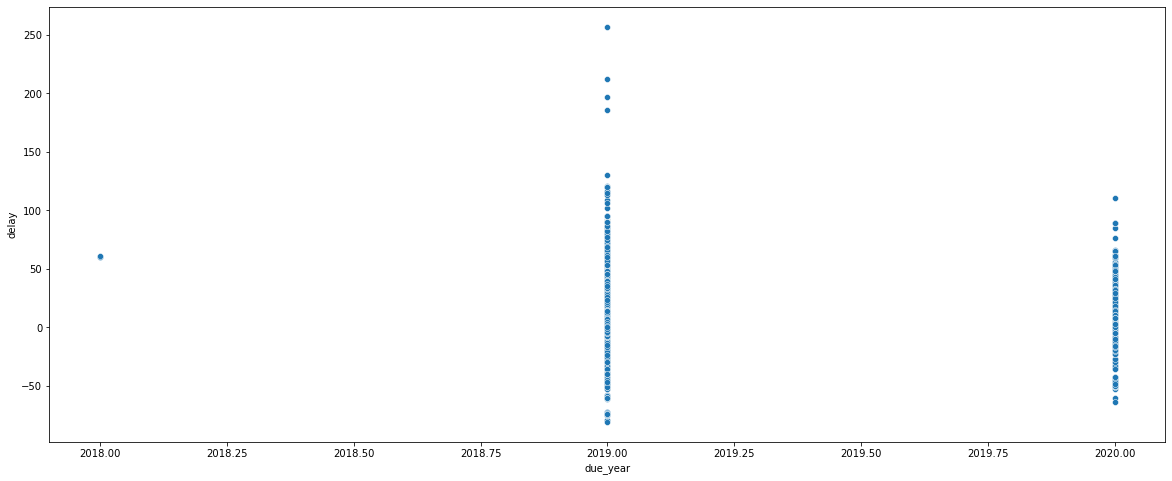

In [406]:
#seeing relation between delay and day,month and year in due date
form=['due_day','due_month','due_year']
for x in form:
    plt.figure(figsize=(20,8))          
    sns.scatterplot(x_train[x],y_train['delay'])
    plt.show()

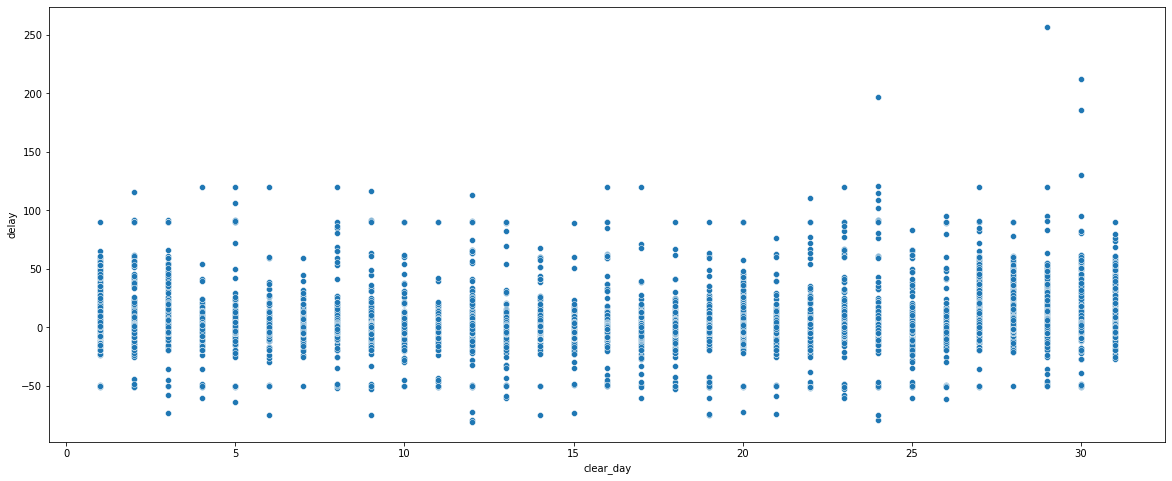

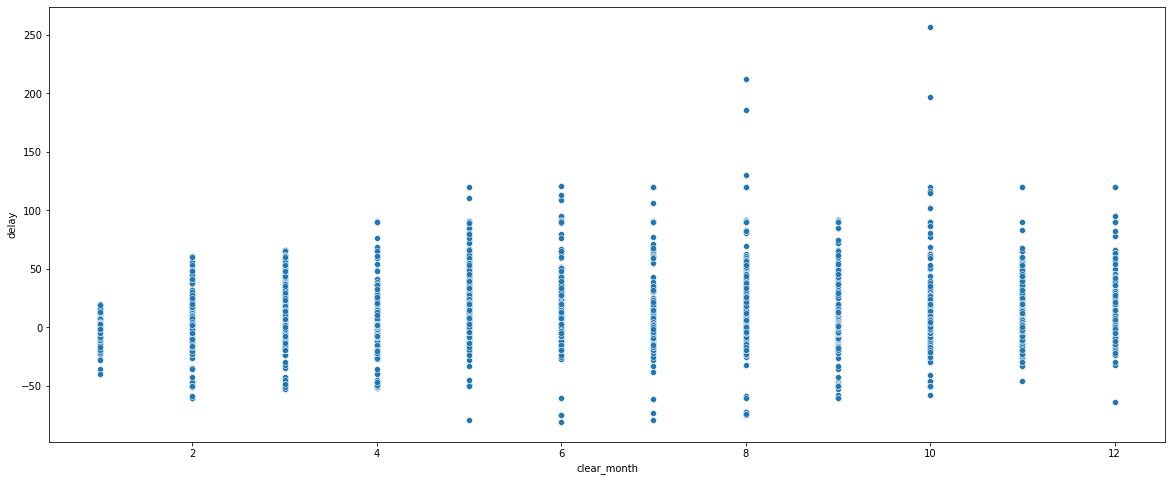

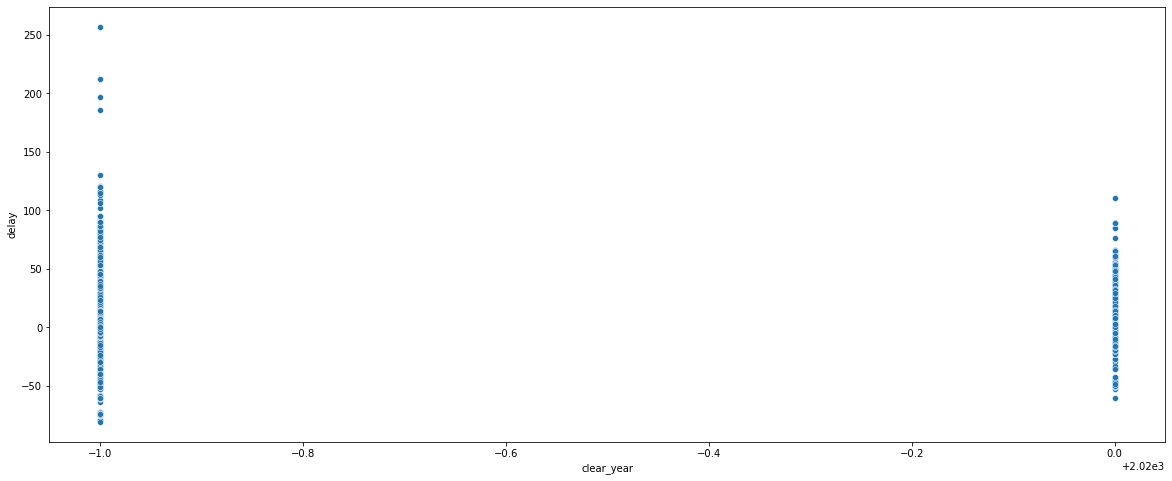

In [407]:
#we saw relationship between clear day,month,year and delay
form=['clear_day','clear_month','clear_year']
for x in form:
    plt.figure(figsize=(20,8))          
    sns.scatterplot(x_train[x],y_train['delay'])
    plt.show()

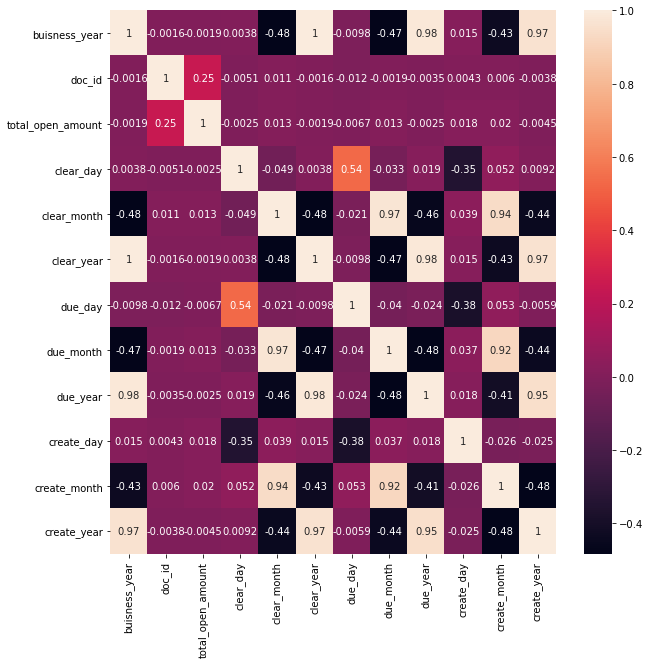

In [408]:
#dependency betweeen the variable of train data
corr=x_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [409]:
#y_train['delay']=y_train['delay'].astype(int)
#plt.figure(figsize=(8,8))
#sns.distplot(np.log(y_train['delay']))
#plt.show()

# Feature Engineering

In [410]:
#used label encoding as we dont want to create more columns and turning bussiness codes into numerical for model to learn
#from the the encoded data
label_encoder = preprocessing.LabelEncoder()

x_train['business_code']=label_encoder.fit_transform(x_train['business_code'])
x_train['business_code'].unique()

x_val1['business_code']=label_encoder.fit_transform(x_val1['business_code'])
x_val1['business_code'].unique()

x_val2['business_code']=label_encoder.fit_transform(x_val2['business_code'])
x_val2['business_code'].unique()

super_test['business_code']=label_encoder.fit_transform(super_test['business_code'])
super_test['business_code'].unique()

array([0, 1, 4, 3, 2])

In [411]:
#used label encoding as we dont want to create more columns and turning bussiness codes into numerical for model to learn
#from the the encoded data
label_encoder = preprocessing.LabelEncoder()

x_train['cust_payment_terms']=label_encoder.fit_transform(x_train['cust_payment_terms'])
x_train['cust_payment_terms'].unique()

x_val1['cust_payment_terms']=label_encoder.fit_transform(x_val1['cust_payment_terms'])
x_val1['cust_payment_terms'].unique()

x_val2['cust_payment_terms']=label_encoder.fit_transform(x_val2['cust_payment_terms'])
x_val2['cust_payment_terms'].unique()

super_test['cust_payment_terms']=label_encoder.fit_transform(super_test['cust_payment_terms'])
super_test['cust_payment_terms'].unique()

array([ 0,  9, 22, 11, 14, 25, 23,  8, 32, 26, 21, 24, 33, 20,  3, 17, 18,
        1, 29,  5, 30, 10, 13, 31,  4, 27, 16,  7,  6, 19, 28, 15,  2, 12])

In [412]:
x_train.head()

,business_code,cust_number,cust_name,buisness_year,doc_id,total_open_amount,cust_payment_terms,clear_day,clear_month,clear_year,due_day,due_month,due_year,create_day,create_month,create_year
0,1,0200799538,UNITE trust,2019.0,1.930163e+09,25723.35,21,4.0,12.0,2019.0,4,12,2019,19,11,2019
1,1,0200936373,SUPE,2019.0,1.929510e+09,151939.64,21,5.0,7.0,2019.0,5,7,2019,20,6,2019
2,1,0200759878,SA systems,2020.0,1.930477e+09,34374.95,36,24.0,2.0,2020.0,21,2,2020,6,2,2020
3,1,0200794332,COST us,2019.0,1.930001e+09,17815.31,23,25.0,10.0,2019.0,26,10,2019,11,10,2019
4,1,0200769623,WAL-MAR us,2019.0,1.928654e+09,14330.98,36,4.0,2.0,2019.0,6,2,2019,22,1,2019


In [413]:
#used target encoding as it gives probabilistc values for encoding categorical values
x_train['target']=y_train
target_mapper = x_train.groupby('cust_number')['target'].mean().to_dict()

x_train=x_train.drop(['target'],axis=1)

x_train['cust_num_en'] = x_train['cust_number'].map(target_mapper)
x_val1['cust_num_en'] = x_val1['cust_number'].map(target_mapper)
x_val2['cust_num_en'] = x_val2['cust_number'].map(target_mapper)
super_test['cust_num_en'] =super_test['cust_number'].map(target_mapper)

In [414]:
#rempving those columns where we used target encoding
x_train = x_train.drop(['cust_number'],axis=1)
x_val1 = x_val1.drop(['cust_number'],axis=1)
x_val2 = x_val2.drop(['cust_number'],axis=1)
super_test = super_test.drop(['cust_number'],axis=1)

In [415]:
#used target encoding as it gives probabilistc values for encoding categorical values
x_train['target']=y_train
target_mapper = x_train.groupby('cust_name')['target'].mean().to_dict()

x_train=x_train.drop(['target'],axis=1)

x_train['cust_name_en'] = x_train['cust_name'].map(target_mapper)
x_val1['cust_name_en'] = x_val1['cust_name'].map(target_mapper)
x_val2['cust_name_en'] = x_val2['cust_name'].map(target_mapper)
super_test['cust_name_en'] = super_test['cust_name'].map(target_mapper)

In [416]:
#rempving those columns where we used target encoding
x_train = x_train.drop(['cust_name'],axis=1)
x_val1 = x_val1.drop(['cust_name'],axis=1)
x_val2 = x_val2.drop(['cust_name'],axis=1)
super_test = super_test.drop(['cust_name'],axis=1)

In [417]:
x_train.isnull().sum()

business_code         0
buisness_year         0
doc_id                0
total_open_amount     0
cust_payment_terms    0
clear_day             0
clear_month           0
clear_year            0
due_day               0
due_month             0
due_year              0
create_day            0
create_month          0
create_year           0
cust_num_en           0
cust_name_en          0
dtype: int64

In [418]:
x_val1.isnull().sum()

business_code           0
buisness_year           0
doc_id                  0
total_open_amount       0
cust_payment_terms      0
clear_day               0
clear_month             0
clear_year              0
due_day                 0
due_month               0
due_year                0
create_day              0
create_month            0
create_year             0
cust_num_en           105
cust_name_en          361
dtype: int64

In [419]:
x_val2.isnull().sum()

business_code           0
buisness_year           0
doc_id                  0
total_open_amount       0
cust_payment_terms      0
clear_day               0
clear_month             0
clear_year              0
due_day                 0
due_month               0
due_year                0
create_day              0
create_month            0
create_year             0
cust_num_en            94
cust_name_en          355
dtype: int64

In [420]:
super_test.isnull().sum()

business_code            0
buisness_year            0
doc_id                   0
doc_create_date          0
total_open_amount        0
cust_payment_terms       0
clear_day             3224
clear_month           3224
clear_year            3224
due_day                  0
due_month                0
due_year                 0
create_day               0
create_month             0
create_year              0
delay                 3224
cust_num_en             27
cust_name_en           123
dtype: int64

<AxesSubplot:xlabel='cust_num_en', ylabel='Count'>

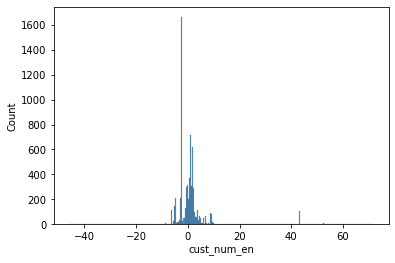

In [421]:
#checking skweness between encoded data
sns.histplot(x_val1['cust_num_en'])

<AxesSubplot:xlabel='cust_name_en', ylabel='Count'>

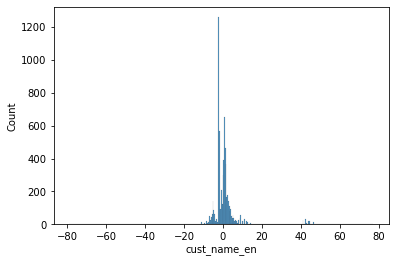

In [422]:
#checking skweness between encoded data
sns.histplot(x_val1['cust_name_en'])

<AxesSubplot:xlabel='cust_num_en', ylabel='Count'>

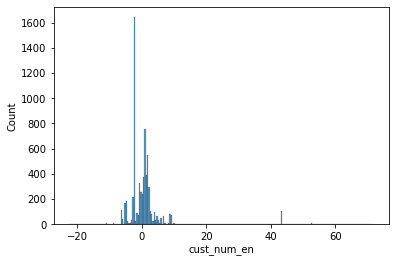

In [423]:
#checking skweness between encoded data
sns.histplot(x_val2['cust_num_en'])

<AxesSubplot:xlabel='cust_name_en', ylabel='Count'>

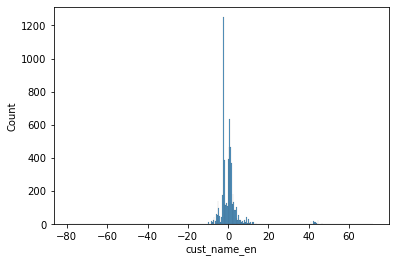

In [424]:
#checking skweness between encoded data
sns.histplot(x_val2['cust_name_en'])

In [425]:
#filling with median data as median can give more generalised data wrt mean as using mean the mean point can shift to 
#more highest vale of the data
x_val1['cust_num_en'] = x_val1['cust_num_en'].fillna(x_val1['cust_num_en'].median())
x_val1['cust_name_en'] = x_val1['cust_name_en'].fillna(x_val1['cust_name_en'].median())
super_test['cust_name_en'] = super_test['cust_name_en'].fillna(super_test['cust_name_en'].median())

In [426]:
#filling with median data as median can give more generalised data wrt mean as using mean the mean point can shift to 
#more highest vale of the data
x_val2['cust_num_en'] = x_val2['cust_num_en'].fillna(x_val2['cust_num_en'].median())
x_val2['cust_name_en'] = x_val2['cust_name_en'].fillna(x_val2['cust_name_en'].median())
super_test['cust_num_en'] = super_test['cust_num_en'].fillna(super_test['cust_num_en'].median())

In [427]:
x_train.dtypes

business_code           int32
buisness_year         float64
doc_id                float64
total_open_amount     float64
cust_payment_terms      int32
clear_day             float64
clear_month           float64
clear_year            float64
due_day                 int64
due_month               int64
due_year                int64
create_day              int64
create_month            int64
create_year             int64
cust_num_en           float64
cust_name_en          float64
dtype: object

# Feature Selection

In [428]:
#used tree based feature selection for slecting more important features as this process combines both filtering and
#wrapper methods and notmuch expensive
def feature_importance(x_train,y_train):
    model = RandomForestRegressor(n_estimators=120)

    model.fit(x_train,y_train)

    importances=model.feature_importances_

    final_df=pd.DataFrame({'Features':x_train.columns,'Importances':importances})
    final_df.set_index('Importances')

    final_df=final_df.sort_values('Importances',ascending=False)
    
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

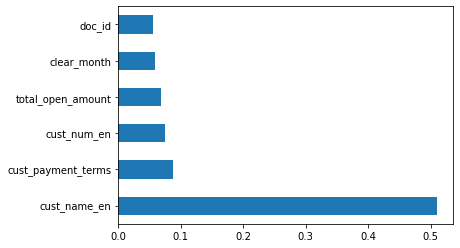

In [429]:
imp=feature_importance(x_train,y_train)

In [430]:
#checking less important features which are not useful fro model 
display(imp)

,Features,Importances
15,cust_name_en,0.510324
4,cust_payment_terms,0.086868
14,cust_num_en,0.074047
3,total_open_amount,0.068382
6,clear_month,0.058287
2,doc_id,0.055038
5,clear_day,0.039070
8,due_day,0.037115
11,create_day,0.029940
12,create_month,0.018548


In [431]:
super_test.head()

,business_code,buisness_year,doc_id,doc_create_date,total_open_amount,cust_payment_terms,clear_day,clear_month,clear_year,due_day,due_month,due_year,create_day,create_month,create_year,delay,cust_num_en,cust_name_en
46761,0,2020.0,2.960618e+09,2020-03-02,57104.06,0,NaN,NaN,NaN,12,3,2020,2,3,2020,NaN,1.680251,1.378378
46762,1,2020.0,1.930628e+09,2020-03-09,538.02,9,NaN,NaN,NaN,24,3,2020,9,3,2020,NaN,0.961868,1.086957
46763,1,2020.0,1.930705e+09,2020-03-27,15778.07,22,NaN,NaN,NaN,11,4,2020,27,3,2020,NaN,-2.224487,-2.399457
46764,1,2020.0,1.930690e+09,2020-03-24,8898.37,11,NaN,NaN,NaN,8,4,2020,24,3,2020,NaN,-0.316971,0.129870
46765,1,2020.0,1.930752e+09,2020-04-06,20883.16,14,NaN,NaN,NaN,21,4,2020,6,4,2020,NaN,-0.645898,0.190000


In [432]:
#remove unuseful features from the train,test,val 
x_val1=x_val1.drop(['buisness_year','due_year','create_year','clear_year'],axis=1)
x_val2=x_val2.drop(['buisness_year','due_year','create_year','clear_year'],axis=1)
x_train=x_train.drop(['buisness_year','due_year','create_year','clear_year'],axis=1)
super_test=super_test.drop(['buisness_year','due_year','create_year','clear_year','doc_create_date','delay'],axis=1)

In [433]:
super_test.shape

(3224, 12)

In [434]:
x_train.shape

(32638, 12)

In [435]:
y_train.shape

(32638, 1)

# Fitting in model

In [436]:
MSE_Score = []
R2_Score = []
RMSE_Score=[]
Algorithm = []

In [437]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val1)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_val1, predicted)))

In [438]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val1)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_val1, predicted)))

In [439]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val1)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_val1, predicted)))

In [440]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val1)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_val1, predicted)))

In [441]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val1)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val1, predicted))
R2_Score.append(r2_score(y_val1, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_val1, predicted)))

In [442]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison_Val1= pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score,RMSE_Score)),
                          columns = ['Algorithm', 'MSE_Score_Val1', 'R2_Score_Val1','RMSE_Score_Val1'])

# Score Card
Comparison_Val1

,Algorithm,MSE_Score_Val1,R2_Score_Val1,RMSE_Score_Val1
0,Linear Regression,72.750931,0.438177,8.529416
1,Support Vector Regression,127.687396,0.013927,11.299885
2,Decision Tree Regressor,138.919359,-0.072812,11.786406
3,Random Forest Regressor,82.466925,0.363145,9.081130
4,XGB Regressor,28.224504,0.782035,5.312674


In [443]:
MSE_Score = []
R2_Score = []
RMSE_Score=[]
Algorithm = []

In [444]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_train)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_train, predicted))
R2_Score.append(r2_score(y_train, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_train, predicted)))

In [445]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_train)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_train, predicted))
R2_Score.append(r2_score(y_train, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_train, predicted)))

In [446]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_train)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_train, predicted))
R2_Score.append(r2_score(y_train, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_train, predicted)))

In [447]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_train)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_train, predicted))
R2_Score.append(r2_score(y_train, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_train, predicted)))

In [448]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_train)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_train, predicted))
R2_Score.append(r2_score(y_train, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_train, predicted)))

In [449]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison_Train= pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score,RMSE_Score)),
                          columns = ['Algorithm', 'MSE_Score_Train', 'R2_Score_Train','RMSE_Score_Train'])

# Score Card
Comparison_Train

,Algorithm,MSE_Score_Train,R2_Score_Train,RMSE_Score_Train
0,Linear Regression,49.386336,0.573006,7.027541
1,Support Vector Regression,113.622532,0.017621,10.659387
2,Decision Tree Regressor,0.000000,1.000000,0.000000
3,Random Forest Regressor,4.538731,0.960758,2.130430
4,XGB Regressor,1.646337,0.985766,1.283097


In [450]:
MSE_Score = []
R2_Score = []
RMSE_Score=[]
Algorithm = []

In [451]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val2)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_val2, predicted)))

In [452]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val2)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_val2, predicted)))

In [453]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val2)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_val2, predicted)))

In [454]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val2)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_val2, predicted)))

In [455]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val2)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val2, predicted))
R2_Score.append(r2_score(y_val2, predicted))
RMSE_Score.append(sqrt(mean_squared_error(y_val2, predicted)))

In [456]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison_Val2= pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score,RMSE_Score)),
                          columns = ['Algorithm', 'MSE_Score_Val2', 'R2_Score_Val2','RMSE_Score_Val2'])

# Score Card
Comparison_Val2

,Algorithm,MSE_Score_Val2,R2_Score_Val2,RMSE_Score_Val2
0,Linear Regression,64.371915,0.446854,8.023211
1,Support Vector Regression,114.850971,0.013088,10.716855
2,Decision Tree Regressor,137.929511,-0.185225,11.744340
3,Random Forest Regressor,74.278752,0.361724,8.618512
4,XGB Regressor,27.808452,0.761043,5.273372


In [457]:
#combines table of different metrics
merge1=pd.merge(Comparison_Train,Comparison_Val1,on='Algorithm')
merge=pd.merge(merge1,Comparison_Val2,on='Algorithm')
merge

,Algorithm,MSE_Score_Train,R2_Score_Train,RMSE_Score_Train,MSE_Score_Val1,R2_Score_Val1,RMSE_Score_Val1,MSE_Score_Val2,R2_Score_Val2,RMSE_Score_Val2
0,Linear Regression,49.386336,0.573006,7.027541,72.750931,0.438177,8.529416,64.371915,0.446854,8.023211
1,Support Vector Regression,113.622532,0.017621,10.659387,127.687396,0.013927,11.299885,114.850971,0.013088,10.716855
2,Decision Tree Regressor,0.000000,1.000000,0.000000,138.919359,-0.072812,11.786406,137.929511,-0.185225,11.744340
3,Random Forest Regressor,4.538731,0.960758,2.130430,82.466925,0.363145,9.081130,74.278752,0.361724,8.618512
4,XGB Regressor,1.646337,0.985766,1.283097,28.224504,0.782035,5.312674,27.808452,0.761043,5.273372


In [458]:
#some bugs are in the code ,only showing the process how  i will proceed further
# Fitting linear Regressor to the Train Set

#clf = LinearRegression()
#clf.fit(x_train, y_train)

# Predicting the Test Set Results
#y_test = clf.predict(super_test)
#y_test = np.ceil(y_test)

In [459]:
#super_test['predicted_delay']=y_test


#def func(x):
#    if(x<0):
#        return "< 0(clears before due date)"
#    elif(x>=0 and x<=15):
#        return "[0-15]"
#    elif(x>=16 and x<=30):
#        return "[16-30]"
#    elif(x>=31 and x<=45):
#        return "[31-45]"
#   elif(x>=46 and x<=60):
#        return "[46-60]"
#    else:
#        return "Greater than 60 days"
    

In [460]:
#super_test['aging_bucket']=super_test['delay'].apply(func)

In [461]:
#delay=super_test['predicted_delay'].apply(lambda x: pd.TimeDelta(x,unit='D')
#super_test['clear_date']=super_test['due_date']+delay

#super_test.drop(['delay'],axis=1)
#super_test.head()